# Multi-Linear Regression from Scratch

## Introduction

In this notebook, we will explore the process of building a multi-linear regression model from scratch to predict movie revenue based on several features. We will start by exploring and cleaning the data, followed by data visualization and preprocessing. We will then dive into the details of constructing the model, training it using gradient descent, and finally evaluating its performance. Additionally, we'll implement an interactive visualization for gradient descent to better understand the optimization process.

## Table of Contents

1. **Exploring the Data**
   - Initial data examination
   - Summary statistics

2. **Data Cleaning**
   - Handling missing values

3. **Data Visualization**
   - Correlation matrix
   - Pair plots

4. **Data Preprocessing**
   - Feature scaling
   - Encoding categorical variables

5. **Multi Linear Regression Model from Scratch**
   - 5.1 **Model Description**
       - Understanding the model equation
   - 5.2 **Model Training**
       - 5.2.1 **Cost Function**
           - Derivation and explanation
   - 5.3 **Learning Algorithm: Gradient Descent**
       - 5.3.1 **Overview**
           - Basic concept and purpose
       - 5.3.2 **Calculating the Gradients for Weights**
           - Mathematical derivation
       - 5.3.3 **Calculating the Gradients for the Intercept**
           - Step-by-step calculation
   - 5.4 **Python Implementation**
       - Coding the model and training process

6. **Model Evaluation**
   - 6.1 **Mean Absolute Error**
       - Calculation and interpretation
   - 6.2 **Accuracy**
       - Metric definition and computation
   - 6.3 **Testing Our Model**
       - Performance on test data
   - 6.4 **Testing the Scikit-Learn Regression Model**
       - Comparison with our implementation
   - 6.5 **Actual Observation vs. Predicted Values**
       - Visual and numerical analysis
   - 6.6 **Regressions for Each Feature**
       - Individual feature impact analysis

7. **Interactive Gradient Descent Visualization for Linear Regression**
   - Dynamic visual representation of gradient descent

---

Let's proceed step by step, starting with exploring the data.


## 1 Exploring the data:

First, we need to explore the dataset to understand which features are available and how they relate to the target variable, movie revenue. This step is crucial for identifying important features, and gaining insights that will guide the subsequent data preprocessing and modeling steps.

In [1]:
# importing libraries we will be using in this project
import pandas as pd
import json
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from ipywidgets import interact, FloatSlider, IntSlider, Output, interactive
from IPython.display import display, clear_output

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Define the path to the dataset
movies_path = '../data/tmdb_5000_movies.csv'

# Load the dataset as Pandas dataFrame
movie_df = pd.read_csv(movies_path)

In [3]:
# Overview of the Pandas DataFrame
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

#### Observations from Data Summary
- The dataset contains a total of 4803 entries and 20 columns.
- The dataset contains some missing values that needs to be treated.
- Most of the dataset is an object type, needs to be converted to numerical dtype.

In [4]:
# Checking the Pandas DataFrame
movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Based on the analysis of the DataFrame, we observe that certain features appear intuitively valuable and may have a strong correlation with our target variable, movie revenue. Features such as `budget`, `popularity`, and `runtime` are likely to be significant predictors. Conversely, there are several columns that are probably irrelevant for our prediction task, such as `id`, `homepage`, and `keywords`, which may not provide meaningful information. Furthermore, the cleaning of the missing values are essential steps to ensure the robustness and accuracy of our predictive model.


## 2    Data Cleaning
One thing we have to do is to fill the null or missing values.

In [5]:
# Filling missing values
movie_df['runtime'].fillna(movie_df['runtime'].mean(), inplace=True)
movie_df['release_date'].fillna('1900-01-01', inplace=True)
movie_df['overview'].fillna('', inplace=True)
movie_df['tagline'].fillna('', inplace=True)

We can improve our dataset by extracting useful information from complex data types like JSON and dates. By converting these into numerical or categorical data, we can use them in our predictions. This helps us find hidden patterns and improve the accuracy of our models.

In [6]:
# Extract features from release_date
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])
movie_df['release_year'] = movie_df['release_date'].dt.year.astype(int)
movie_df['release_month'] = movie_df['release_date'].dt.month.astype(int)
movie_df['release_day'] = movie_df['release_date'].dt.day.astype(int)

# Drop the original 'release_date' column
movie_df.drop(columns=['release_date'], inplace=True)

# Now you can access the 'release_year' column
movie_df['release_year']

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4798    1992
4799    2011
4800    2013
4801    2012
4802    2005
Name: release_year, Length: 4803, dtype: int32

In [7]:
movie_df['genres'] # Printing the genres column

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object

Genres can be valuable for predicting revenue, as some genres may have more fans and thus higher revenue. Therefore, it's important to extract all unique genres in the dataset and use one-hot encoding to encode these features.

In [8]:
def extract_unique_features_from_json(json_column_name : str, df: pd.DataFrame) -> set:
    """
    Extracts unique features from the 'name' column of columns of JSON type in a DataFrame.

    Parameters:
    - json_column_name (str): Name of the JSON column in the DataFrame.
    - df (pandas.DataFrame): DataFrame containing the JSON column.

    Returns:
    - set: A set containing unique features in the DataFrame.
    """
    if json_column_name not in df.columns:
        raise ValueError(f"Column '{json_column_name}' not found in the DataFrame.")
    
    # Initialize an empty set to store unique genres
    unique_features = set()

    # Iterate over each JSON string in the 'genres' column
    for features_json in movie_df[json_column_name]:
        # Load JSON string into a Python list
        features_list = json.loads(features_json)
        
        # Extract genre names from the list
        for feature_info in features_list:
            # Assuming the genre name is stored under the key 'name'
            feature_name = feature_info.get('name')
            
            # Check if genre name exists and add it to the set
            if feature_name:
                unique_features.add(feature_name)
            
    return unique_features

genres = extract_unique_features_from_json('genres', movie_df)
print("These are the unique genres presented in the dataset " + '\n' + str(genres))


These are the unique genres presented in the dataset 
{'Fantasy', 'TV Movie', 'Science Fiction', 'Family', 'Action', 'Thriller', 'History', 'Animation', 'Horror', 'Mystery', 'Drama', 'Crime', 'Adventure', 'Romance', 'War', 'Music', 'Documentary', 'Western', 'Comedy', 'Foreign'}


We have implemented our custom one-hot encoding based on the unique genres identified earlier.

In [9]:
# Custom One Hit Encoding of genres

# Initialize all genre columns to zero
for genre in genres:
    movie_df[genre] = 0

# Update genre columns to 1 if the genre exists in the movie's genres list
for row_index in range(movie_df.shape[0]):
    genres_list = json.loads(movie_df['genres'][row_index])
    for genre_info in genres_list:
        genre_name = genre_info.get('name')
        if genre_name:
            movie_df.at[row_index, genre_name] = 1

In [10]:
# Checking the Pandas DataFrame
movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,Drama,Crime,Adventure,Romance,War,Music,Documentary,Western,Comedy,Foreign
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,0,0,1,0,0,0,0,0,0,0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,0,0,1,0,0,0,0,0,0,0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,0,1,1,0,0,0,0,0,0,0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1,1,0,0,0,0,0,0,0,0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,0,0,1,0,0,0,0,0,0,0


Now we can remove some unnecessary features to start our data analysis

In [11]:
# remove unesesary columns
movie_df.drop(columns=['genres',
                       'homepage',
                       'id',
                       'keywords',
                       'original_language',
                       'original_title',
                       'overview',
                       'production_companies',
                       'production_countries',
                       'title',
                       'spoken_languages',
                       'status',
                       'tagline'
                       ], inplace=True)

In [12]:
# Overview of the Pandas DataFrame
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           4803 non-null   int64  
 1   popularity       4803 non-null   float64
 2   revenue          4803 non-null   int64  
 3   runtime          4803 non-null   float64
 4   vote_average     4803 non-null   float64
 5   vote_count       4803 non-null   int64  
 6   release_year     4803 non-null   int32  
 7   release_month    4803 non-null   int32  
 8   release_day      4803 non-null   int32  
 9   Fantasy          4803 non-null   int64  
 10  TV Movie         4803 non-null   int64  
 11  Science Fiction  4803 non-null   int64  
 12  Family           4803 non-null   int64  
 13  Action           4803 non-null   int64  
 14  Thriller         4803 non-null   int64  
 15  History          4803 non-null   int64  
 16  Animation        4803 non-null   int64  
 17  Horror        

## 3 Data Visualization
Data visualization is essential for understanding how our features relate to each other. By visualizing the data, we can determine if the relationships are simple and straight or more complex. This helps us pick the right features for our linear regression model and avoid using ones that might lead to wrong predictions.

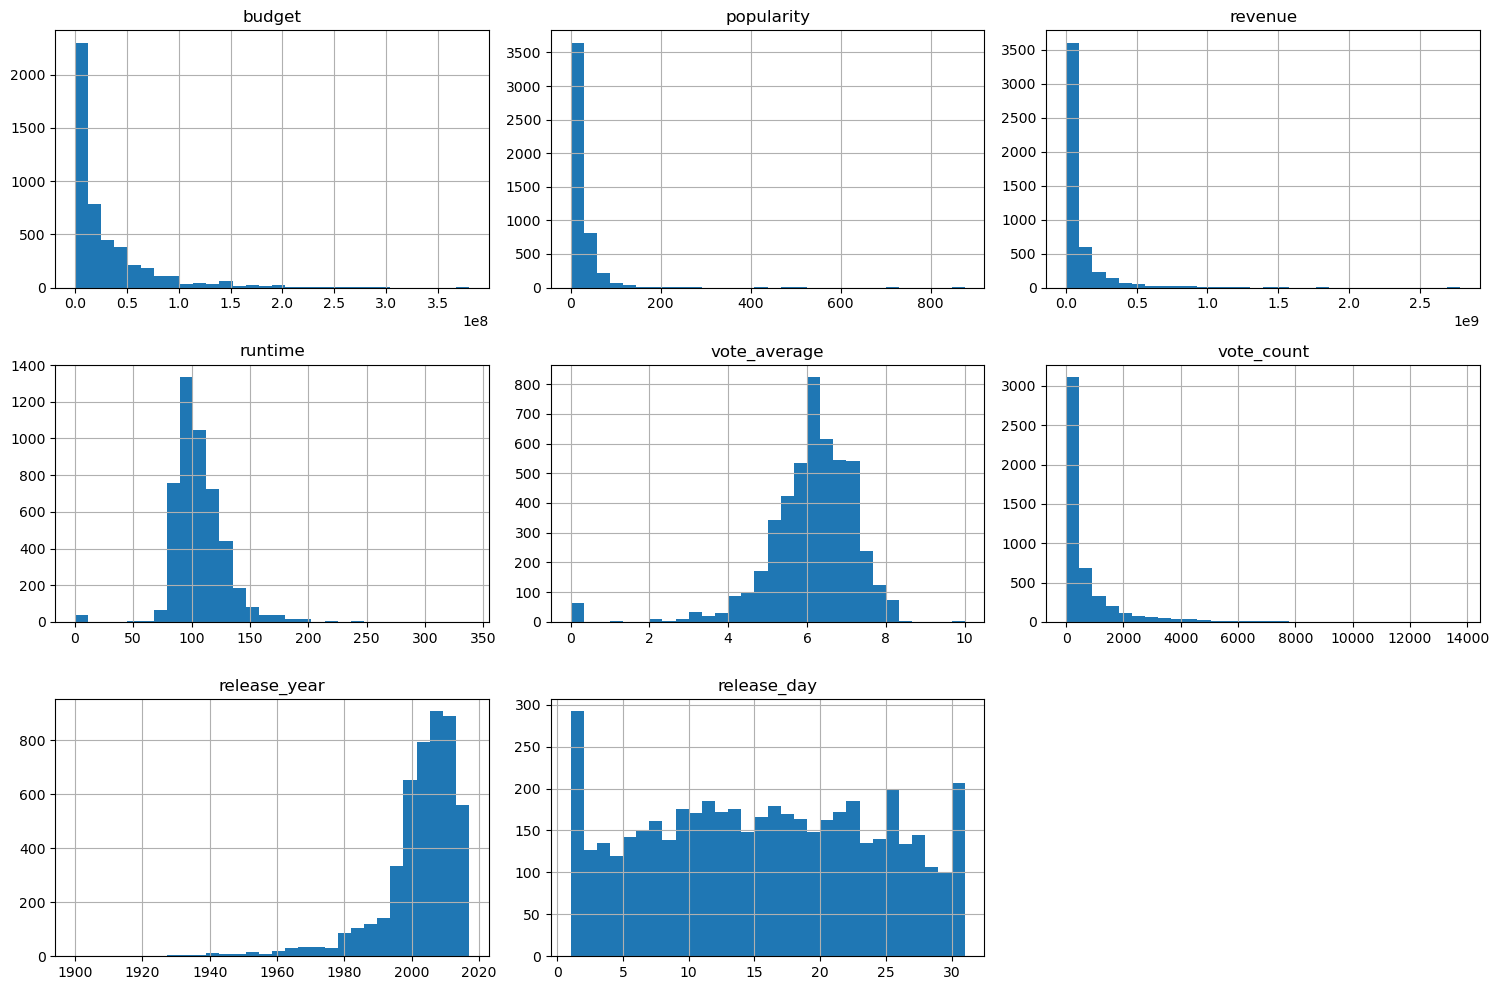

In [13]:
# Plot histograms for numerical features
movie_df[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'release_year', 'release_day']].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

budget          0.730823
popularity      0.644724
revenue         1.000000
runtime         0.251080
vote_average    0.197150
vote_count      0.781487
release_year    0.090419
release_day     0.043677
Name: revenue, dtype: float64


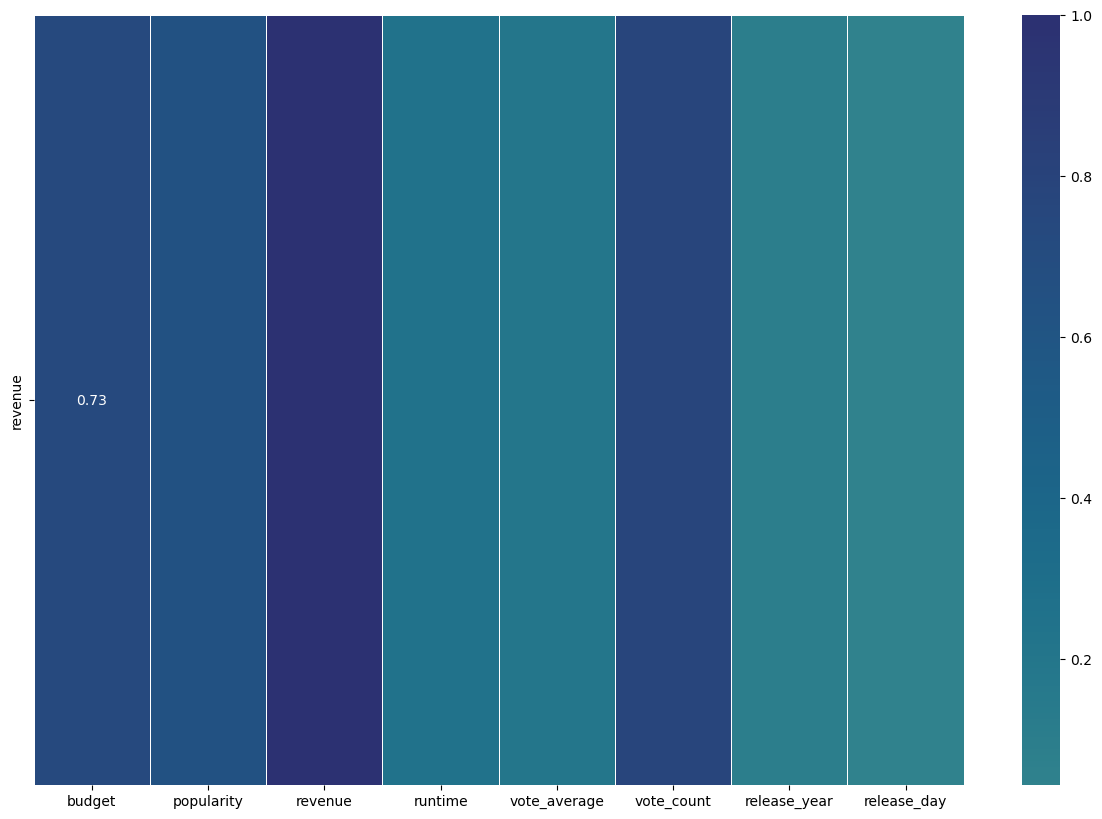

In [14]:
# Exploring linear relationships via the correlation matrix

# Compute the correlation matrix for the DataFrame
correlation_matrix = movie_df[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'release_year', 'release_day']].corr()

# Extract correlations with specific target variables (revenue and vote_average)
target_correlations = correlation_matrix['revenue']

# Display the correlation values with respect to the target variables
print(target_correlations)

# Plot the heatmap
plt.figure(figsize=(15, 10))  # Set the figure size
heatmap = sns.heatmap(target_correlations.to_frame().T, annot=True, fmt='.2f', cmap='crest', center=0, linewidth=.5)  # Plot the heatmap with annotations

# Adjust font size for better readability
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)  # Set x-axis tick label font size
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)  # Set y-axis tick label font size

plt.show()  # Display the heatmap


The correlation matrix and heatmap show how features relate to the target value "revenue." However, they might not be enough for low values. High correlation values indicate strong linear relationships, which are ideal for a linear model.

To gain a comprehensive understanding of all the features, scatter plots are a helpful tool for observing both linear and non-linear relationships.

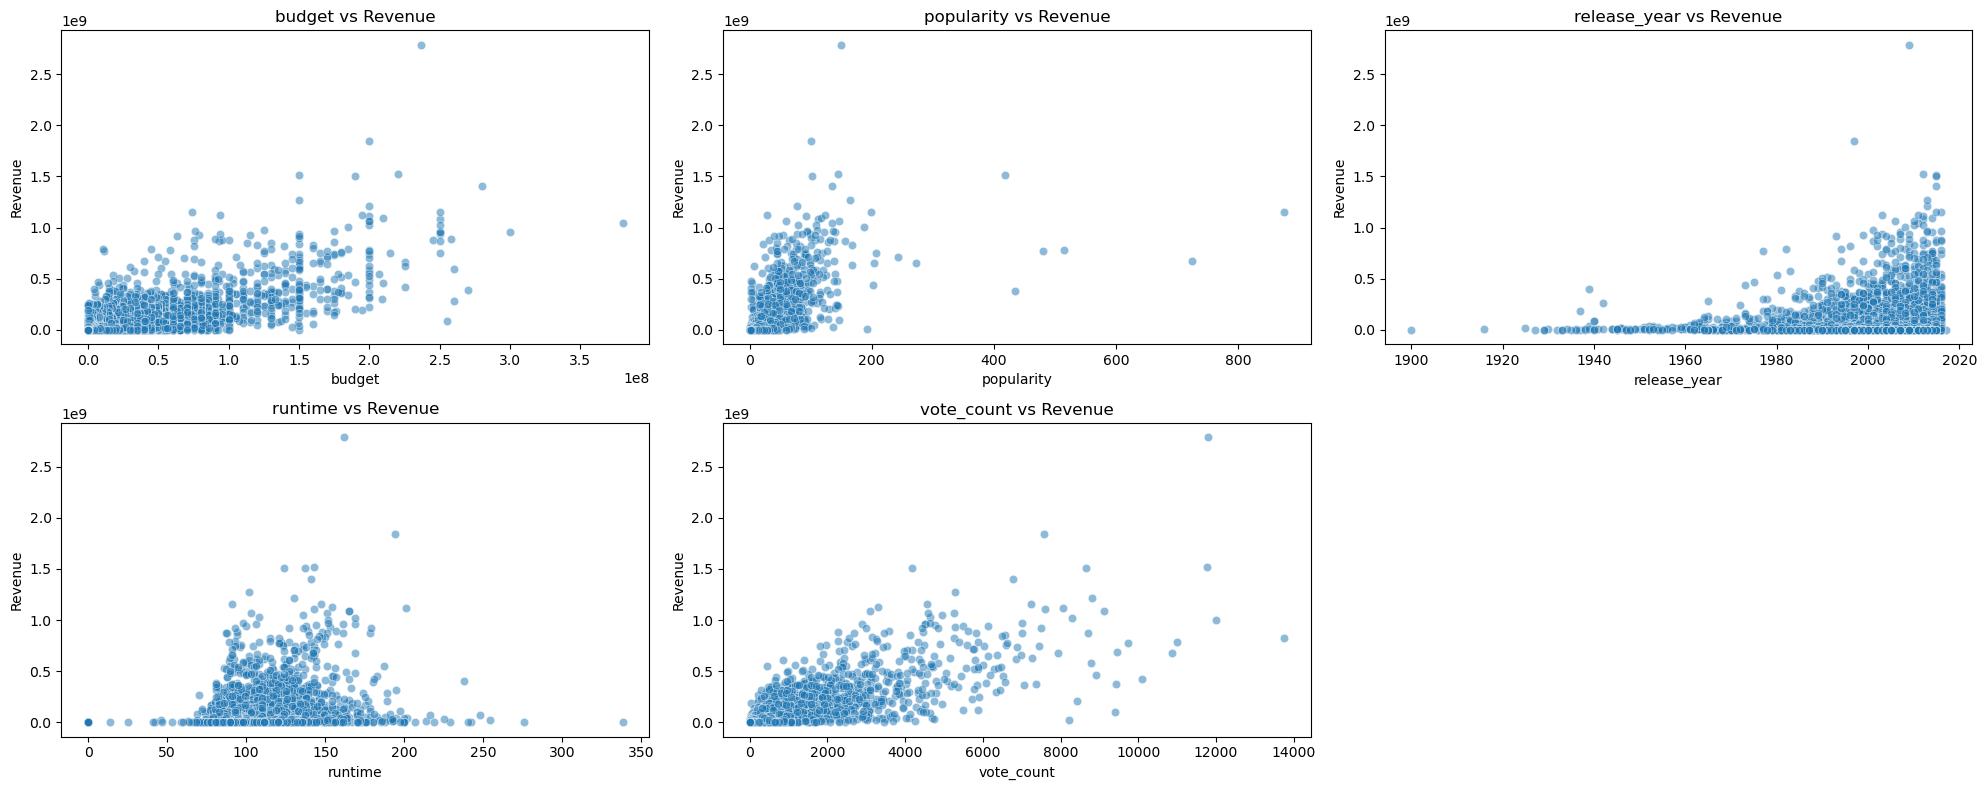

In [15]:
# Selected numerical features
selected_features = ['budget', 'popularity', 'release_year', 'runtime', 'vote_count']

# Function to create scatter plots for selected features
def plot_scatter_for_selected_features(df, features, target, target_name):
    n_features = len(features)
    n_cols = 3  # Number of columns in the grid
    n_rows = (n_features + n_cols - 1) // n_cols  # Calculate number of rows needed
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    for i, feature in enumerate(features):
        sns.scatterplot(data=df, x=feature, y=target, ax=axes[i], alpha=0.5)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(target_name)
        axes[i].set_title(f'{feature} vs {target_name}')
    
    # Hide any unused subplots
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Plotting selected features against 'revenue'
plot_scatter_for_selected_features(movie_df, selected_features, 'revenue', 'Revenue')

To comprehend the relationship between categorical data like genres and revenue, scatter plots aren't suitable since categorical data represents 0 or 1 for each movie. Instead, we'll use the mean revenue of each genre to illustrate their relationship. High mean revenue indicates a strong correlation, while low mean revenue suggests otherwise.

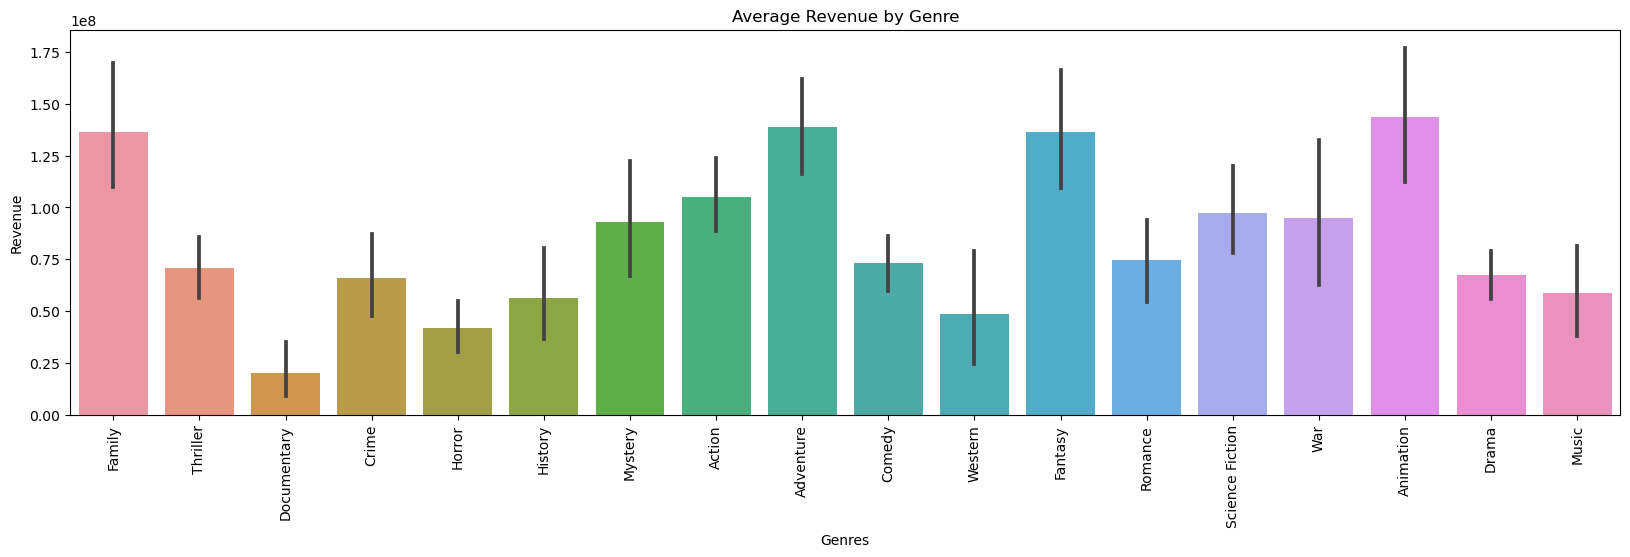

In [16]:
genre_columns = ['Family', 'Thriller', 'Documentary', 'Crime', 'Horror', 'History', 'Mystery', 
                 'Action', 'Adventure', 'Comedy', 'Western', 'Fantasy', 'Romance', 
                 'Science Fiction', 'War', 'Animation', 'Drama', 'Music']

# Function to create bar plots for genre features
def plot_genre_bar_plots(df, genres, target, target_name):
    genre_means = df[genres + [target]].groupby(genres).mean().reset_index()
    melted_genre_means = genre_means.melt(id_vars=target, value_vars=genres)
    melted_genre_means = melted_genre_means[melted_genre_means['value'] == 1]
    
    plt.figure(figsize=(20, 5))
    sns.barplot(data=melted_genre_means, x='variable', y=target)
    plt.xlabel('Genres')
    plt.ylabel(target_name)
    plt.title(f'Average {target_name} by Genre')
    plt.xticks(rotation=90)
    plt.show()

# Plotting average revenue by genre
plot_genre_bar_plots(movie_df, genre_columns, 'revenue', 'Revenue')

## 4.Data Preprocessing
### Feature Rescaling and Normalization

this step is important to adjust the scale of the features to balance the data, one of the normalization techniques used is called the **Z-score normalization and it’s calculated by** using both the mean value $\mu_{\vec{x}}$ and the standard deviation $\sigma_{\vec{x}}$

The standard deviation is a statistical measurement of the dispersion of a dataset relative to its mean or average value, it helps us understand the variability in a dataset.

It can be calculated by the following formula:

$\begin{align}\sigma_{\vec{x}} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i-\mu_{\vec{x}})^2}\tag{1}\end{align}$

After calculating the standard deviation we can calculate the scaled vector :

$\begin{align}\vec{x}_{scaled}=\frac{\vec{x}-\mu_{\vec{x}}}{\sigma_{\vec{x}}}\tag{2}\end{align}$

Generally, feature scaling needs to be done on large values or very small values, your values generally needs to be between $x\in[-1,1]$

In [17]:
def z_score_normalization(X):
    """
    Perform Z-score normalization on the features.

    Parameters:
    - X: np.ndarray, shape (n_samples, n_features)
        Feature matrix.

    Returns:
    - np.ndarray, shape (n_samples, n_features)
        Normalized feature matrix.
    """
    # Compute mean and standard deviation for each feature
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    
    # Avoid division by zero
    std_dev[std_dev == 0] = 1
    
    # Apply Z-score normalization
    X_normalized = (X - mean) / std_dev
    
    return X_normalized

# Here we can choose the features that we want to train our model on.

#numerical_features = ['budget', 'popularity', 'vote_count']

numerical_features = ['budget', 'popularity', 'release_year', 'runtime', 'vote_count']

X = movie_df[numerical_features].values
X_normalized = np.array(z_score_normalization(X))
y = np.array(movie_df['revenue'].values)

print('Features before Normalization : \n' + str(X))
print('Features after Normalization : \n' + str(X_normalized))

Features before Normalization : 
[[2.37000000e+08 1.50437577e+02 2.00900000e+03 1.62000000e+02
  1.18000000e+04]
 [3.00000000e+08 1.39082615e+02 2.00700000e+03 1.69000000e+02
  4.50000000e+03]
 [2.45000000e+08 1.07376788e+02 2.01500000e+03 1.48000000e+02
  4.46600000e+03]
 ...
 [0.00000000e+00 1.44447600e+00 2.01300000e+03 1.20000000e+02
  6.00000000e+00]
 [0.00000000e+00 8.57008000e-01 2.01200000e+03 9.80000000e+01
  7.00000000e+00]
 [0.00000000e+00 1.92988300e+00 2.00500000e+03 9.00000000e+01
  1.60000000e+01]]
Features after Normalization : 
[[ 5.10718073  4.05318294  0.52422641  2.43859561  8.99972924]
 [ 6.65440223  3.69625836  0.36422009  2.74826337  3.08619976]
 [ 5.3036533   2.69963777  1.00424536  1.81926009  3.05865729]
 ...
 [-0.71331921 -0.63017043  0.84423905  0.58058904 -0.5542662 ]
 [-0.71331921 -0.64863652  0.76423589 -0.39265249 -0.55345613]
 [-0.71331921 -0.61491246  0.20421377 -0.7465585  -0.54616547]]


Now it’s time to split our data into training data that will be used to train the model, and the rest is test data to evaluate the model.

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test_original = X_test

X_test = np.array(z_score_normalization(X_test))
X_train = np.array(z_score_normalization(X_train))

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3842, 5)
y_train shape: (3842,)
X_test shape: (961, 5)
y_test shape: (961,)


## 5    Multi Linear Regression Model From Scratch

### 5.1 Model Description

Linear Regression is a mathematical model that predicts a continuous numerical output $\hat{y}$ based on a feature vector $\vec{x}$.

The model is represented by it’s parameters, they called the weights $\vec{w}$ and the intercept $b$

The idea is to calculate the following prediction:

$\begin{align}\hat{y}=w_1x_1+w_2x_2+\cdots+w_nx_n+b=\vec{w}.\vec{x}+b\end{align}\tag{3}$

so we can abstract the following equation and make it a function:

$\begin{align}f_{\vec{w},b}(\vec{x})=\vec{w}.\vec{x}+b\end{align}\tag{4}$

Note that the vector $\vec{w}$ and $\vec{x}$ are not multiplied but we will operate the dot product of it, this kind of operation is called vector operation which is a part of the vectorization process.

This function will only predict a single vector $\vec{x}$ but what do we do if we want to predict a range of testing samples ?

in this case we will change our input $\vec{x}$ and introduce the Matrix $X$ defined is follows

$\begin{align}X= \begin{bmatrix} x^{(1)}_1& x^{(1)}_2 & \cdots & x^{(1)}_m \\ x^{(2)}_1& x^{(2)}_2 & \cdots & x^{(2)}_m  \\ \vdots& \vdots & \vdots & \vdots  \\ x^{(n)}_1& x^{(n)}_2 & \cdots & x^{(n)}_m \end{bmatrix}\end{align}\tag{5}$

where $m$ is the feature number and the $n$ is the number of samples.

so our function return a vector of predicted values for each sample and be defined as follows:

$\begin{align}\begin{bmatrix} f_{\vec{w},b}(\vec{x}^{(1)}) & f_{\vec{w},b}(\vec{x}^{(2)}) & \cdots & f_{\vec{w},b}(\vec{x}^{(n)})\end{bmatrix} =X.\vec{w}+b\end{align}\tag{6}$

and here is it’s implementation using NumPy arrays

In [19]:
def linear_reg_prediction(X : np.ndarray, weights : np.ndarray, intercept : float) -> float:
    """
    Predicts the output values using a linear regression model.

    Parameters:
    - X: np.ndarray, shape (n_samples, m_features)
        Input feature matrix.
    - weights: np.ndarray, shape (m_features,)
        Weights of the linear regression model.
    - intercept: float
        Offset (intercept) of the linear regression model.

    Returns:
    - np.ndarray, shape (n_samples,)
        Predicted output values.
    """
    return np.dot(X, weights) + intercept

### 5.2 Model Training
#### 5.2.1  Cost function
This model has specific parameters, $\vec{w}$ and $b$, that we need to find to make accurate predictions. By "accurate," we mean values that are close to the actual values in the testing set for the same input vector, $\vec{x}$. The goal is to find $\vec{w}$ and $b$ so that the error $\hat{y} - y$ is minimized.

In linear regression, this error is measured by a special function called the cost function. The cost function evaluates the performance of the model and is defined mathematically as follows:

$\begin{align}J(\vec{w},b)=\frac{1}{2n}\sum_{i=1}^{n}(\hat{y_{i}}-y_i)^2=\frac{1}{2}mean((\hat{y_{i}}-y_i)^2)\end{align}\tag{7}$

In [20]:
def compute_squared_mean_error(X : np.ndarray, y : np.ndarray, weights : np.ndarray, intercept : float):
    """
    Computes the mean squared error for a linear regression model.

    Parameters:
    - X: np.ndarray, shape (n_samples, m_features)
        Input feature matrix.
    - y: np.ndarray, shape (n_samples,)
        True output values.
    - weights: np.ndarray, shape (m_features,)
        Weights of the linear regression model.
    - intercept: float
        Offset (intercept) of the linear regression model.

    Returns:
    - float
        Mean squared error between the predicted and true output values.
    """
    predictions = linear_reg_prediction(X, weights, intercept)
    cost = np.mean((predictions - y) ** 2)
    return cost / 2

Let's test our regression model before training

In [21]:
# Get the number of features (number of columns) in X_train
num_features = X_train.shape[1]

# Initialize weights
weights = np.array(np.zeros(num_features))
offset = 0

predictions = linear_reg_prediction(X_train, weights, offset)
print("Linear Regression Model Before Training Predictions : " + str(predictions))

cost = compute_squared_mean_error(X_train, y_train, weights, offset)
print("Squared Mean Error Before Training : " + str(cost))

Linear Regression Model Before Training Predictions : [0. 0. 0. ... 0. 0. 0.]
Squared Mean Error Before Training : 1.6646949711851704e+16


### 5.3 Learning Algorithm: Gradient Descent

#### 5.3.1  Overview

Now we need to find the best $\vec{w}$ and $b$ to minimize the cost function. We will use the gradient descent algorithm for this.

The idea is simple: we repeatedly adjust $\vec{w}$ and $b$ by taking small steps in the direction that reduces the cost function the most. This involves calculating the derivatives of the cost function with respect to $\vec{w}$ and $b$ and updating these parameters until the cost function reaches its lowest point.

the weights $\vec{w}$ and the intercept $b$ will be updated in each iteration by the following formula:

$\begin{align}&w_j\gets w_j-\alpha.\frac{\partial}{\partial{w_j}}J(\vec{w},b) \\  &b\gets b-\alpha.\frac{\partial}{\partial{b}}J(\vec{w},b)\end{align}\tag{8}$ 

Note that we are only updating $w_j$ but in our case, the gradient should return a vector $\vec{w}$ of updated values:

$\begin{align}\begin{bmatrix}w_1 \\w_2 \\\vdots \\w_m\end{bmatrix} \gets \begin{bmatrix} w_1\\ w_2\\ \vdots\\w_m\end{bmatrix} - \alpha\begin{bmatrix} \frac{\partial}{\partial{w_1}}J(\vec{w},b) \\ \frac{\partial}{\partial{w_2}}J(\vec{w},b)\\ \vdots\\\frac{\partial}{\partial{w_m}}J(\vec{w},b)\end{bmatrix}\end{align}\tag{9}$

so we can conclude:

$\begin{align}\vec{w} \gets \vec{w}-\alpha\frac{\partial}{\partial{\vec{w}}}J(\vec{w},b)\end{align}\tag{10}$

#### 5.3.2 Calculating the Gradients for Weights

to calculate the gradient we just derive the cost function by all the weights for each time.
when we calculate the partial derivative of the cost function concerning $w_j$ we get the following formula:

$\begin{align}\frac{\partial J(\vec{w},b)}{\partial w_j}  = \frac{1}{n} \sum\limits_{i = 1}^{n} (\vec{w}.\vec{x}^{(i)} - y^{(i)}+b)x^{(i)}_j\end{align}\tag{11}$

which can be generalised as follows:

$\begin{align}\begin{bmatrix} \frac{\partial}{\partial{w_1}}J(\vec{w},b) \\ \frac{\partial}{\partial{w_2}}J(\vec{w},b)\\ \vdots\\\frac{\partial}{\partial{w_m}}J(\vec{w},b)\end{bmatrix} = \frac{1}{n}\sum\limits_{i = 1}^{n} (\vec{w}.\vec{x}^{(i)} - y^{(i)}+b)\begin{bmatrix} x^{(i)}_1\\  x^{(i)}_2\\ \vdots\\x^{(i)}_m\end{bmatrix}\end{align}\tag{12}$

which finally can be vectorized by the following formula:

$\begin{align}\nabla_{\vec{w}}J(\vec{w},b)= \begin{bmatrix} \frac{\partial}{\partial{w_1}}J(\vec{w},b) \\ \frac{\partial}{\partial{w_2}}J(\vec{w},b)\\ \vdots\\\frac{\partial}{\partial{w_m}}J(\vec{w},b)\end{bmatrix} = \frac{1}{n}X^T(X.\vec{w}+b-\vec{y})\end{align}\tag{13}$

and thus we can update our weights by the following formula:

$\begin{align}\vec{w}\gets \vec{w}-\alpha.\nabla_{\vec{w}}J(\vec{w},b)\end{align}\tag{14}$

#### 5.3.3 Calculating the Gradients for the intercept

The intercept will have a similar and simpler formula. By using the same vectorization techniques, we can conclude that:

$\begin{align}\frac{\partial J(\vec{w},b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 1}^{n} (\vec{w}.\vec{x}^{(i)} - y^{(i)}+b)\end{align}\tag{15}$

so the update formula will be as follows:

$\begin{align}b\gets b-\alpha.\frac{\partial}{\partial{b}}J(\vec{w},b)\end{align}\tag{16}$

### 5.4 Python implementation

for the python implementation of the gradient descent we will first define some terms:

$predections = \vec{\hat{y}}=X.\vec{w}+b$

$errors = \vec{\hat{y}}-\vec{y}$

so the `weight_gradients`: $\nabla_{\vec{w}}J(\vec{w},b)=\frac{1}{n}X^T\cdot errors$ 

and finally the `intercept_gradient` : $\frac{\partial}{\partial{b}}J(\vec{w},b) =\frac{1}{n}sum(errors)$

and here is the implemented function using NumPy:

In [22]:
def gradient_descent(X, y, weights, intercept, learning_rate, num_iterations):
    """
    Perform gradient descent to minimize the cost function for a linear regression model.

    Parameters:
    - X: np.ndarray, shape (n_samples, m_features)
        Input feature matrix.
    - y: np.ndarray, shape (n_samples,)
        True output values.
    - weights: np.ndarray, shape (m_features,)
        Weights of the linear regression model.
    - intercept: float
        Offset (intercept) of the linear regression model.
    - learning_rate: float
        Learning rate alpha for gradient descent.
    - num_iterations: int
        Number of iterations for the algorithm.

    Returns:
    - tuple
        Updated weights, updated offset, and list of cost values at each iteration.
    """
    cost_history = []  # List to store the cost at each iteration
    m = len(y)  # Number of training examples

    for i in range(num_iterations):
        # Compute predictions
        predictions = linear_reg_prediction(X, weights, intercept)
        
        # Calculate errors
        errors = predictions - y
        
        # Compute gradients
        weight_gradients = (1/m) * np.dot(X.T, errors)
        intercept_gradient = (1/m) * np.sum(errors)
        
        # Update weights and offset
        weights -= learning_rate * weight_gradients
        intercept -= learning_rate * intercept_gradient
        
        # Compute and store the cost
        cost = compute_squared_mean_error(X, y, weights, intercept)
        cost_history.append(cost)
        
        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return weights, intercept, cost_history

After implementing gradient descent, I've created an interactive tool that lets you adjust the learning rate and the number of iterations. The learning rate controls how quickly the algorithm updates the weights, while the number of iterations determines how many times the algorithm runs. With this tool, you can see how well our algorithm works and how the cost function converges over the iterations.

In [23]:

# Define sliders
learning_rate_slider = FloatSlider(value=0.001, min=0.0001, max=1, step=0.0001, description='Learning Rate:', readout_format='.4f')
num_iterations_slider = IntSlider(value=1500, min=100, max=5000, step=100, description='Iterations:')

def plot_cost_history(cost_history):
    """
    Plots the cost history based on iterations.

    Parameters:
    - cost_history: list
        List containing the cost at each iteration.
    """
    # Plot cost history
    plt.plot(range(len(cost_history)), cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs Iterations')

def interactive_gradient_descent(learning_rate, num_iterations):
    global weights, offset
    weights = np.zeros(X_train.shape[1]) 
    offset = 0
    weights, offset, cost_history = gradient_descent(X_train, y_train, weights, offset, learning_rate, num_iterations)
    return weights, offset, cost_history

def update_plot(learning_rate, num_iterations):
    weights, offset, cost_history = interactive_gradient_descent(learning_rate, num_iterations)
    
    plt.figure(figsize=(10, 5))
    
    # Plot only the gradient descent cost history
    plot_cost_history(cost_history)
    
    plt.show()

output = Output()
display(output)
with output:
    interact(update_plot, learning_rate=learning_rate_slider, num_iterations=num_iterations_slider)


Output()

## 6    Model Evaluation:
### 6.1 Mean Absolute Error

Evaluating and measuring a model's performance is a crucial step in a machine learning project. It shows how accurately a model can predict values with known real mappings. We use a testing dataset, typically 20% of the original data, for this evaluation.

$\begin{align}MAE=\frac{1}{n}\sum_{i=1}^{n}\left| y_i-\hat{y_{i}} \right| \end{align}\tag{17}$

where $y_i$ is the observed value, $\hat{y_{i}}$ is the predicted value, and $n$ is the number of observations.
### 6.2 Accuracy
Accuracy is another key metric. It indicates the proportion of correct predictions out of the total predictions. The formula for accuracy is:

$\begin{align}Accuracy=\frac{Number \space of \space Correct \space Predictions}{Total\space Number\space of\space Predictions}\end{align}\tag{18}$

Higher accuracy means better model performance. However, accuracy alone can be misleading especially with imbalanced datasets. In such cases, additional metrics like precision, recall, and F1 score provide a more complete picture of model performance.

to test our model performance we will use the accuracy based on the mean absolute error that is described as follows:

first, we have to calculate the mean absolute error by the formula mentioned before. This metric provides an indication of the average error in the predictions.

And then we have to calculate the mean of true values to use it for normalization process:

$\begin{align}Mean(\vec{y})=\frac{1}{n}\sum_{i=1}^{n}y_i\end{align}\tag{19}$

This represents the average value of the actual target values.

To interpret the MAE as a measure of accuracy, the MAE is normalized by dividing it by the mean of the true values. This provides a relative measure of error:

$\begin{align}\frac{MAE}{Mean(\vec{y})}\end{align}\tag{20}$

And finally we can use the following formula to calculate the accuracy:

$\begin{align}Accuracy =1-\frac{MAE}{Mean(\vec{y})}\end{align}\tag{21}$

This method of calculating accuracy provides a way to interpret the error in terms of overall model performance, where an accuracy of 1 would imply perfect predictions (zero error), and lower values indicate decreasing prediction quality.
### 6.3 Testing our model
Here is the relevant portion of the Python code implementing this:

In [24]:
# Testing the model
def calculate_mae(y_true, y_pred):
    """
    Calculate the Mean Absolute Error (MAE) between the true and predicted values.

    Parameters:
    - y_true: np.ndarray
        Array containing the true target values.
    - y_pred: np.ndarray
        Array containing the predicted target values.

    Returns:
    - float
        Mean Absolute Error (MAE) between the true and predicted values.
    """
    return np.mean(np.abs(y_true - y_pred))

def test_model(X_test, y_test, weights, offset):
    """
    Test the linear regression model on the test set and calculate the Mean Absolute Error (MAE).

    Parameters:
    - X_test: np.ndarray, shape (n_samples, n_features)
        Input feature matrix of the test set.
    - y_test: np.ndarray, shape (n_samples,)
        True target values of the test set.
    - weights: np.ndarray, shape (n_features,)
        Weights of the linear regression model.
    - offset: float
        Offset (intercept) of the linear regression model.

    Returns:
    - float
        Mean Absolute Error (MAE) between the true and predicted values on the test set.
    """
    # Predict target values using the trained model
    y_pred = linear_reg_prediction(X_test, weights, offset)
    
    # Calculate Mean Absolute Error (MAE)
    mae = calculate_mae(y_test, y_pred)
    
    return mae

def calculate_accuracy(y_true, y_pred):
    """
    Calculate the accuracy based on Mean Absolute Error (MAE).

    Parameters:
    - y_true: np.ndarray
        Array containing the true target values.
    - y_pred: np.ndarray
        Array containing the predicted target values.

    Returns:
    - float
        Accuracy calculated based on Mean Absolute Error (MAE).
    """
    mae = np.mean(np.abs(y_true - y_pred))
    accuracy = 1 - mae / np.mean(y_true)
    return accuracy

y_pred = linear_reg_prediction(X_test, weights, offset)

# Test the model and calculate accuracy
accuracy = calculate_accuracy(y_test, y_pred)
print("Accuracy on test set of my Linear Model:", accuracy)

Accuracy on test set of my Linear Model: 0.4255167414559399


### 6.4 Testig the scikit-learn regression model
In the next section, we will use a Scikit-learn regression model and evaluate its performance using the same method. We will observe that our model's accuracy is very close to that of the Scikit-learn model, demonstrating the correct implementation of our multivariate linear regression model.

In [25]:
# Create a Linear Regression model using Scikit-learn 
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Test the model and calculate accuracy
accuracy = calculate_accuracy(y_test, y_pred)
print("Accuracy on test set of my Sciket-Learn Linear Model:", accuracy)

Accuracy on test set of my Sciket-Learn Linear Model: 0.4860557406942839


### 6.5 Actual Observation vs. Predicted values
Additionally, we have included a plot illustrating the predicted values juxtaposed with the real values. This visual representation offers a clear indication of our model's performance. Ideally, the points on the plot should align closely with the line representing the function $f(y_i)=y_i$, demonstrating the model's accuracy.

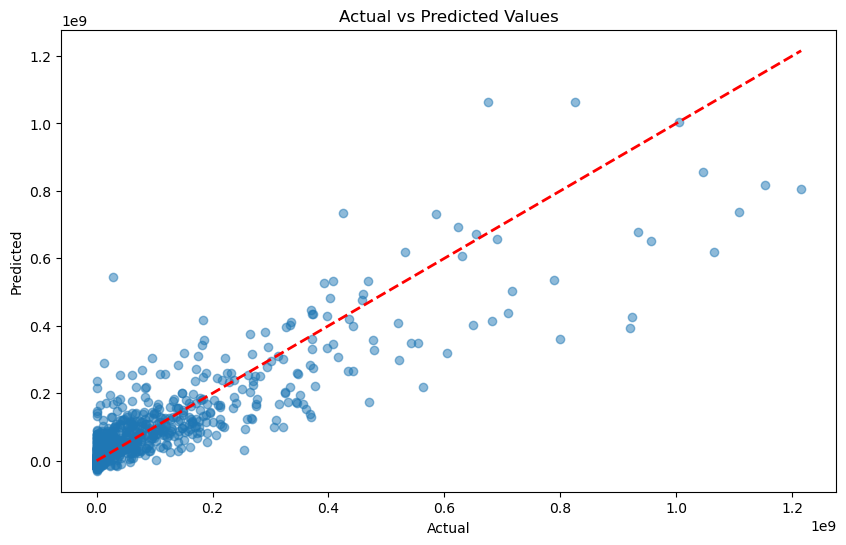

In [26]:


# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

###  6.6 Regressions for each feature
In the case of using a multivariate linear regression model, it's impractical to plot all the features and predictions together due to the dimensionality of our features exceeding two. Therefore, we'll plot the model's predictions separately for each feature.

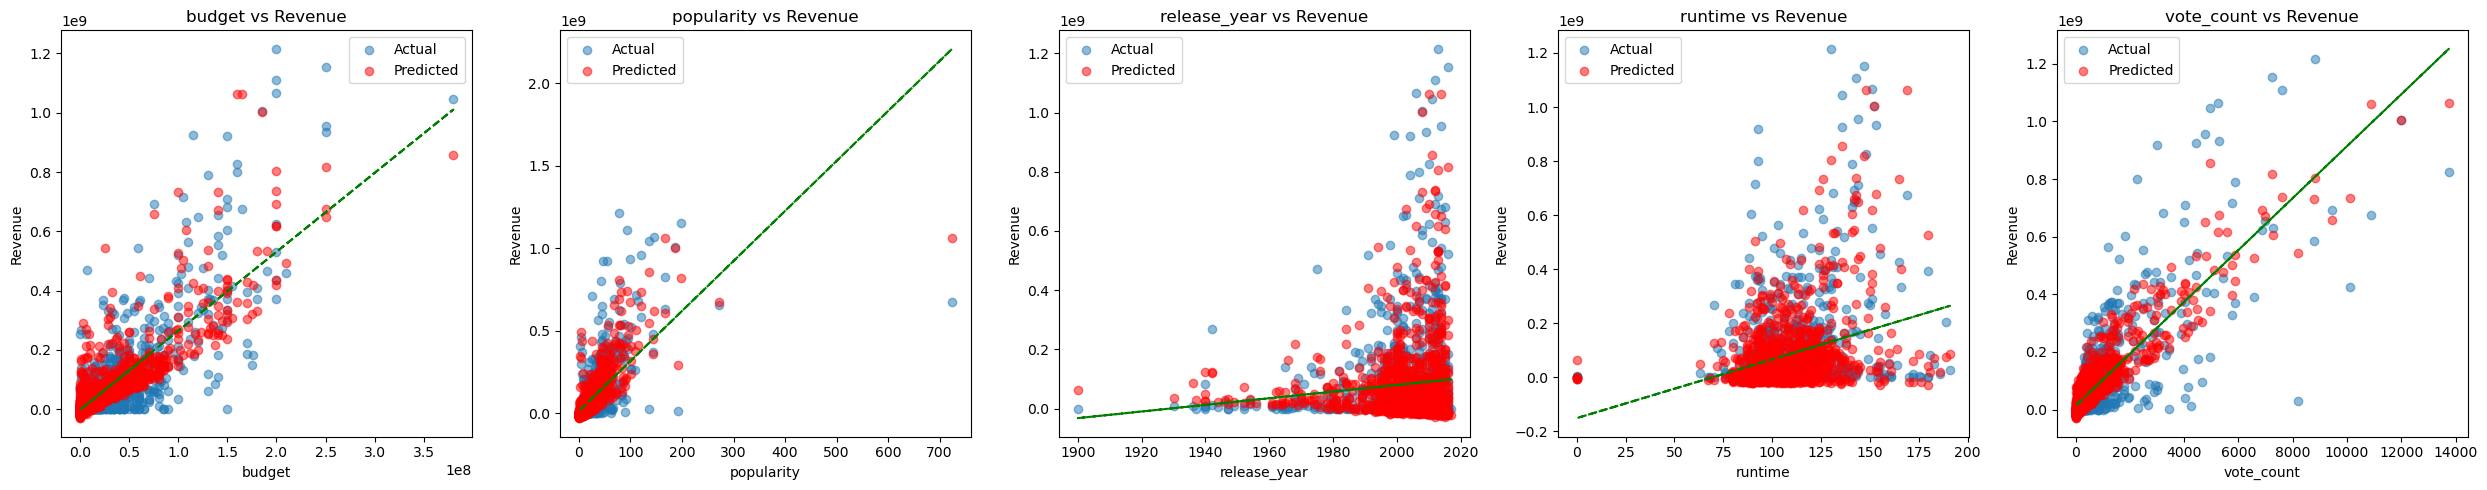

In [27]:


# Select the numerical features
feature_indices = [numerical_features.index(feature) for feature in numerical_features]

# Create subplots
fig, axs = plt.subplots(1, len(numerical_features), figsize=(25, 5))

# Plotting each feature against the target (revenue)
for i, feature in enumerate(numerical_features):
    axs[i].scatter(X_test_original[:, feature_indices[i]], y_test, alpha=0.5, label='Actual')
    axs[i].scatter(X_test_original[:, feature_indices[i]], y_pred, alpha=0.5, label='Predicted', color='r')
    
    # Fit a line for better visualization
    z = np.polyfit(X_test_original[:, feature_indices[i]], y_pred, 1)
    p = np.poly1d(z)
    axs[i].plot(X_test_original[:, feature_indices[i]], p(X_test_original[:, feature_indices[i]]), "g--")
    
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Revenue')
    axs[i].set_title(f'{feature} vs Revenue')
    axs[i].legend()

plt.tight_layout()
plt.show()


## 7  Interactive Gradient Descent Visualization for Linear Regression

Here we explore how learning rate and iterations affect model convergence, predictions, and the role of each feature in determining the final weights and intercept.

In [28]:


# Define sliders
learning_rate_slider = FloatSlider(value=0.001, min=0.0001, max=1, step=0.0001, description='Learning Rate:', readout_format='.4f')
num_iterations_slider = IntSlider(value=1500, min=100, max=5000, step=100, description='Iterations:')

def plot_cost_history(cost_history):
    """
    Plots the cost history based on iterations.

    Parameters:
    - cost_history: list
        List containing the cost at each iteration.
    """
    # Plot cost history
    plt.plot(range(len(cost_history)), cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs Iterations')

def interactive_gradient_descent(learning_rate, num_iterations):
    global weights, offset
    weights = np.zeros(X_train.shape[1]) 
    offset = 0
    weights, offset, cost_history = gradient_descent(X_train, y_train, weights, offset, learning_rate, num_iterations)
    return weights, offset, cost_history

def update_plot(learning_rate, num_iterations):
    weights, offset, cost_history = interactive_gradient_descent(learning_rate, num_iterations)
    
    # Update predictions based on new weights and offset
    y_pred_updated = np.dot(X_test, weights) + offset
    
    # Clear previous output
    clear_output(wait=True)
    
    # Display the new model parameters
    print(f"Model Parameters:\nWeights: {weights}\nIntercept: {offset}")
    
    # Create the plots
    plt.figure(figsize=(10, 10))
    
    # Subplot of gradient descent cost history
    plt.subplot(6, 2, 1)
    plot_cost_history(cost_history)
    
    # Scatter plot for actual vs predicted values
    plt.subplot(6, 2, 2)
    plt.scatter(y_test, y_pred_updated, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted Values')
    
    # Subplots for each numerical feature
    feature_indices = [numerical_features.index(feature) for feature in numerical_features]
    
    for i, feature in enumerate(numerical_features):
        plt.subplot(6, 2, 3 + i)
        plt.scatter(X_test_original[:, feature_indices[i]], y_test, alpha=0.5, label='Actual')
        plt.scatter(X_test_original[:, feature_indices[i]], y_pred_updated, alpha=0.5, label='Predicted', color='r')

        # Fit a line for better visualization
        z = np.polyfit(X_test_original[:, feature_indices[i]], y_pred_updated, 1)
        p = np.poly1d(z)
        plt.plot(X_test_original[:, feature_indices[i]], p(X_test_original[:, feature_indices[i]]), "g--")

        plt.xlabel(feature)
        plt.ylabel('Revenue')
        plt.title(f'{feature} vs Revenue')
        plt.legend()
    
    plt.tight_layout()
    plt.show()


output = Output()
display(output)
with output:
    interact(update_plot, learning_rate=learning_rate_slider, num_iterations=num_iterations_slider)


Output()

Here, we can try out different feature values to test our model. By doing this, we can see how the revenue changes based on the inputs, helping us understand how well the model works.

In [29]:


# Define the widgets for each feature
budget_slider = FloatSlider(description='Budget:', min=0, max=movie_df['budget'].max(), step=1e6, value=1e7)
popularity_slider = FloatSlider(description='Popularity:', min=0, max=movie_df['popularity'].max(), step=0.1, value=5)
release_year_slider = IntSlider(description='Release Year:', min=1900, max=2025, step=1, value=2000)
runtime_slider = FloatSlider(description='Runtime:', min=0, max=300, step=1, value=120)
vote_count_slider = IntSlider(description='Vote Count:', min=0, max=1e5, step=1, value=1000)

# Define the prediction function
def predict_revenue(budget, popularity, release_year, runtime, vote_count):
    prediction = budget + popularity + release_year + runtime + vote_count
    x_input = np.array([[budget, popularity, release_year, runtime, vote_count]])
    
    # Normalize the input using the range of the data
    normalization_coef = X_normalized.max(axis=0) / X.max(axis=0)
    x_input_normalized = x_input * normalization_coef
    
    prediction = linear_reg_prediction(x_input_normalized, weights, offset)
    print("Predicted Revenue: $" + str(prediction))

# Create the interactive interface
interactive_predict = interactive(predict_revenue,
                                  budget=budget_slider,
                                  popularity=popularity_slider,
                                  release_year=release_year_slider,
                                  runtime=runtime_slider,
                                  vote_count=vote_count_slider)

# Display the interactive interface
display(interactive_predict)

interactive(children=(FloatSlider(value=10000000.0, description='Budget:', max=380000000.0, step=1000000.0), F…